In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv("/Users/Man/Desktop/Machine Learning Exercise/machine-learning-ex2/ex2/ex2data1.txt", header = None)

In [5]:
df.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [6]:
df.rename({0:"First Exam Score", 1:"Second Exam Score", 2:"Admission"}, axis="columns", inplace=True)

In [7]:
df.head()

,First Exam Score,Second Exam Score,Admission
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


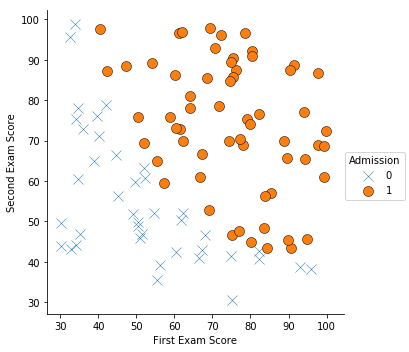

In [8]:
plot = sns.FacetGrid(df, hue="Admission", hue_kws={"marker": ["x", "o"]}, size=5)
plot.map(plt.scatter, "First Exam Score", "Second Exam Score", s=100, linewidth=.5, edgecolor="black")
plot.add_legend()
plt.show()

In [9]:
# initialize θ0, θ1, θ2 as 0
theta = np.zeros(3)
theta

array([0., 0., 0.])

In [10]:
# create a new column for df with X1 = 1
df["x1"] = 1

In [11]:
df = df[["x1", "First Exam Score", "Second Exam Score", "Admission"]]

In [12]:
df.head()

,x1,First Exam Score,Second Exam Score,Admission
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1


In [13]:
# sepeate the x and y column
x = df.iloc[:, :3]
y = df.iloc[:, 3]

In [14]:
x.head()

,x1,First Exam Score,Second Exam Score
0,1,34.623660,78.024693
1,1,30.286711,43.894998
2,1,35.847409,72.902198
3,1,60.182599,86.308552
4,1,79.032736,75.344376


In [15]:
y = y.to_frame()

In [16]:
y.head()

,Admission
0,0
1,0
2,0
3,1
4,1


In [17]:
# create a sigmoid function to train the x column
def sigmoid(z):
    return 1 / (1+ np.exp(-z))

In [18]:
# convert x,y column to array
x = np.array(x.values)
y = np.array(y.values)

In [19]:
result = sigmoid(np.matrix(x) * np.matrix(theta).T)
result

matrix([[0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0

In [20]:
# create a function to calculate the cost function of the logistic regression
# the cost function for logistic regression is -log(hθ(x)) if y = 1, -log(1-hθ(x)) if y = 0
# the simplify version of the cost function is: -ylog(hθ(x)) - (1-y)log(1-hθ(x))
def costfunction(theta, x, y):
    x = np.matrix(x)
    y = np.matrix(y)
    theta = np.matrix(theta)
    return np.sum(np.multiply(-y, np.log(sigmoid(x * theta.T))) - np.multiply((1 - y), np.log(1 - sigmoid(x * theta.T)))) / (len(x))

In [21]:
costfunction(theta, x, y)

0.6931471805599453

In [22]:
# test with different parameter
costfunction(np.matrix([-24,0.2,0.2]),x,y)

0.21833019382659782

In [23]:
# create a gradient function to calculate the gradient of the logistic regression
def gradient(theta, x, y):
    theta = np.matrix(theta)
    x = np.matrix(x)
    y = np.matrix(y)
    grad = np.zeros(3)
    shape = int(theta.ravel().shape[1])
    error = sigmoid(x * theta.T) - y
    return (x.T * error) / len(x)

In [24]:
gradient(theta, x, y)

matrix([[ -0.1       ],
        [-12.00921659],
        [-11.26284221]])

In [25]:
# create a gradientDescrnt function to calculate gradien descent
def gradientDescent(x, y, theta, alpha, num_iter):
    x = np.matrix(x)
    y = np.matrix(y)
    theta = np.matrix(theta)
    theta = theta.T
    for i in range(num_iter):
        h = sigmoid(x * theta)
        theta = theta - ((alpha/len(x)) * (x.T * (h - y)))
    return theta.T

In [26]:
a = gradientDescent(x,y,theta,0.001, 1000000)

In [27]:
costfunction(a,x,y)

0.22465416189188267

In [28]:
a

matrix([[-15.39517866,   0.12825989,   0.12247929]])

In [29]:
# create a debug function to see if the gradient descent function is working properly
def debug(x,y,theta,alpha, num_iter):
    cost = []
    for i in range(num_iter):
        cost.append(costfunction(gradientDescent(x, y, theta, alpha, i),x, y))
    return cost

In [30]:
y_axis = debug(x,y,theta,0.001, 1000)

In [31]:
x_axis = np.arange(1000)

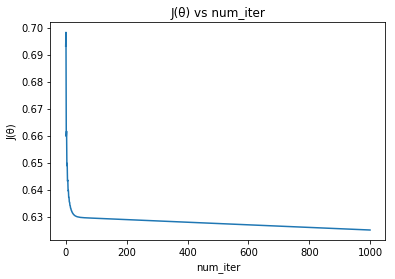

In [32]:
plt.plot(x_axis, y_axis)
plt.title("J(θ) vs num_iter")
plt.xlabel("num_iter")
plt.ylabel("J(θ)")
plt.show()
# the graph show the cost function decrease after iterated 1000 times with alpha = 0.001

In [ ]:
# after iterated for 1000000 time with alpha as 0.001, the cost function is 0.224, which is much smaller than the original cost 0.69

In [33]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=costfunction, x0=theta, fprime=gradient, args=(x, y))

In [34]:
result

(array([-25.16131848,   0.20623159,   0.20147148]), 36, 0)

In [93]:
# as we can see from the above output, the parameter that will minimized the cost function is θ1 = -25.16131848, θ2 = 0.20623159, θ3 = 0.20147148.

In [35]:
minimized_theta = np.array([-25.16131848, 0.20623159, 0.20147148])

In [36]:
result = sigmoid(np.matrix(x) * np.matrix(minimized_theta).T)

In [42]:
# craete a list that contain the value of the result
g = []
for i in result:
    if i >= 0.5:
        g.append(1)
    else:
        g.append(0)

In [43]:
# create a list that contain the value of the y axis
u = []
for i in y:
    u.append(i[0])

In [44]:
result = g
y_axis = u

In [45]:
#create a function to test the accuracy of the minimized_theta
def acurracy(result, y_axis):
    total = 0
    i = 0
    if len(result) == len(y_axis):
        length = len(result)
    while i < length:
        if result[i] == y_axis[i]:
            total += 1
        i += 1
    return total/length

In [46]:
acurracy(result, y_axis)
# as we see from the result, the accuracy of this model with the dataset is 89%, which is not bad.

0.89

In [ ]:
a = np.arange(30, 101)

In [59]:
# the decision boundary formula for this dataset is θ1X1 + θ2Χ2 + θ3Χ3 >= 0
# which in this case is -25.16131848X1 + 0.20623159X2 + 0.20147148X2 >= 0
# with a little algebra, the formula become X3 = (25.16131848 - 0.20623159X1)/0.20147148
def formula(a):
    lis = []
    for i in a:
        lis.append((25.16131848-0.20623159*i)/0.20147148)
    return lis

In [ ]:
Y_AXIS = formula(a)

In [60]:
X_AXIS = list(a)

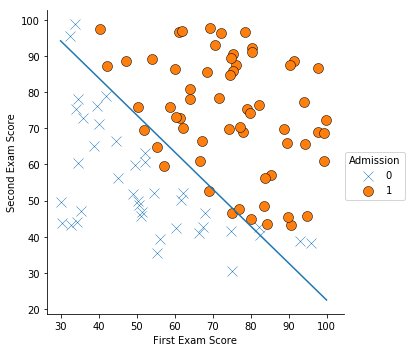

In [61]:
# make a graph with decision boundary
plot = sns.FacetGrid(df, hue="Admission", hue_kws={"marker": ["x", "o"]}, size=5)
plot.map(plt.scatter, "First Exam Score", "Second Exam Score", s=100, linewidth=.5, edgecolor="black")
plot.add_legend()
plt.plot(X_AXIS,Y_AXIS)
plt.show()